##**Sleepy Driver EEG Brainwave Prediction**

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

**Data Preprocesin**

In [2]:
df = pd.read_csv('acquiredDataset.csv')
df.head(5)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [5]:
df.describe().transpose().style.background_gradient(cmap = 'Greens')

In [6]:
df.median()

attention             48.0
meditation            56.0
delta             277382.0
theta              57972.0
lowAlpha           16481.0
highAlpha          14928.0
lowBeta            13841.0
highBeta            9739.0
lowGamma            4440.0
highGamma          57198.0
classification         0.0
dtype: float64

In [7]:
df.skew()

attention        -0.010962
meditation       -0.029183
delta             1.657414
theta             4.030050
lowAlpha          4.852354
highAlpha         5.464175
lowBeta           4.710650
highBeta          4.411688
lowGamma          9.905020
highGamma         2.393601
classification    0.289581
dtype: float64

In [8]:
df.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

In [9]:
df.columns

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification'],
      dtype='object')

In [10]:
df.shape

(3735, 11)

**Exploratory Data Analysis**

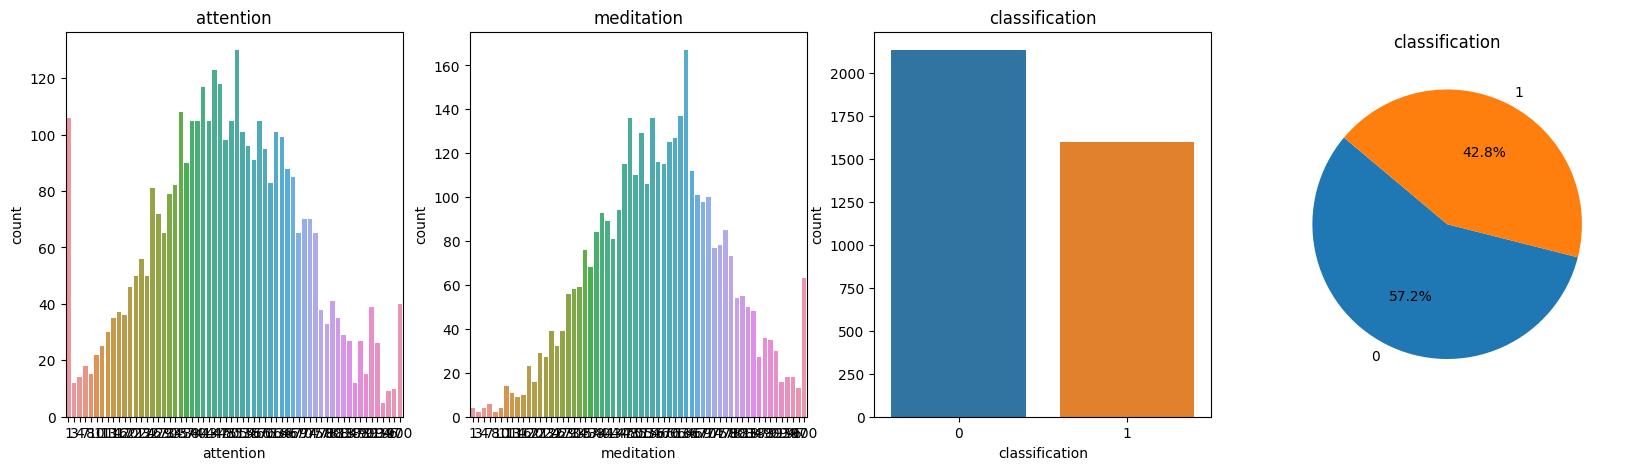

In [41]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(data = df , x = 'attention',ax = ax[0])
sns.countplot(data = df , x = 'meditation',ax = ax[1])
sns.countplot(data = df , x = 'classification',ax = ax[2])

ax[3].pie(df['classification'].value_counts(), labels=df['classification'].value_counts().index, autopct='%1.1f%%', startangle=140)

ax[0].set_title('attention')
ax[1].set_title('meditation')
ax[2].set_title('classification')
ax[3].set_title('classification')

plt.show()

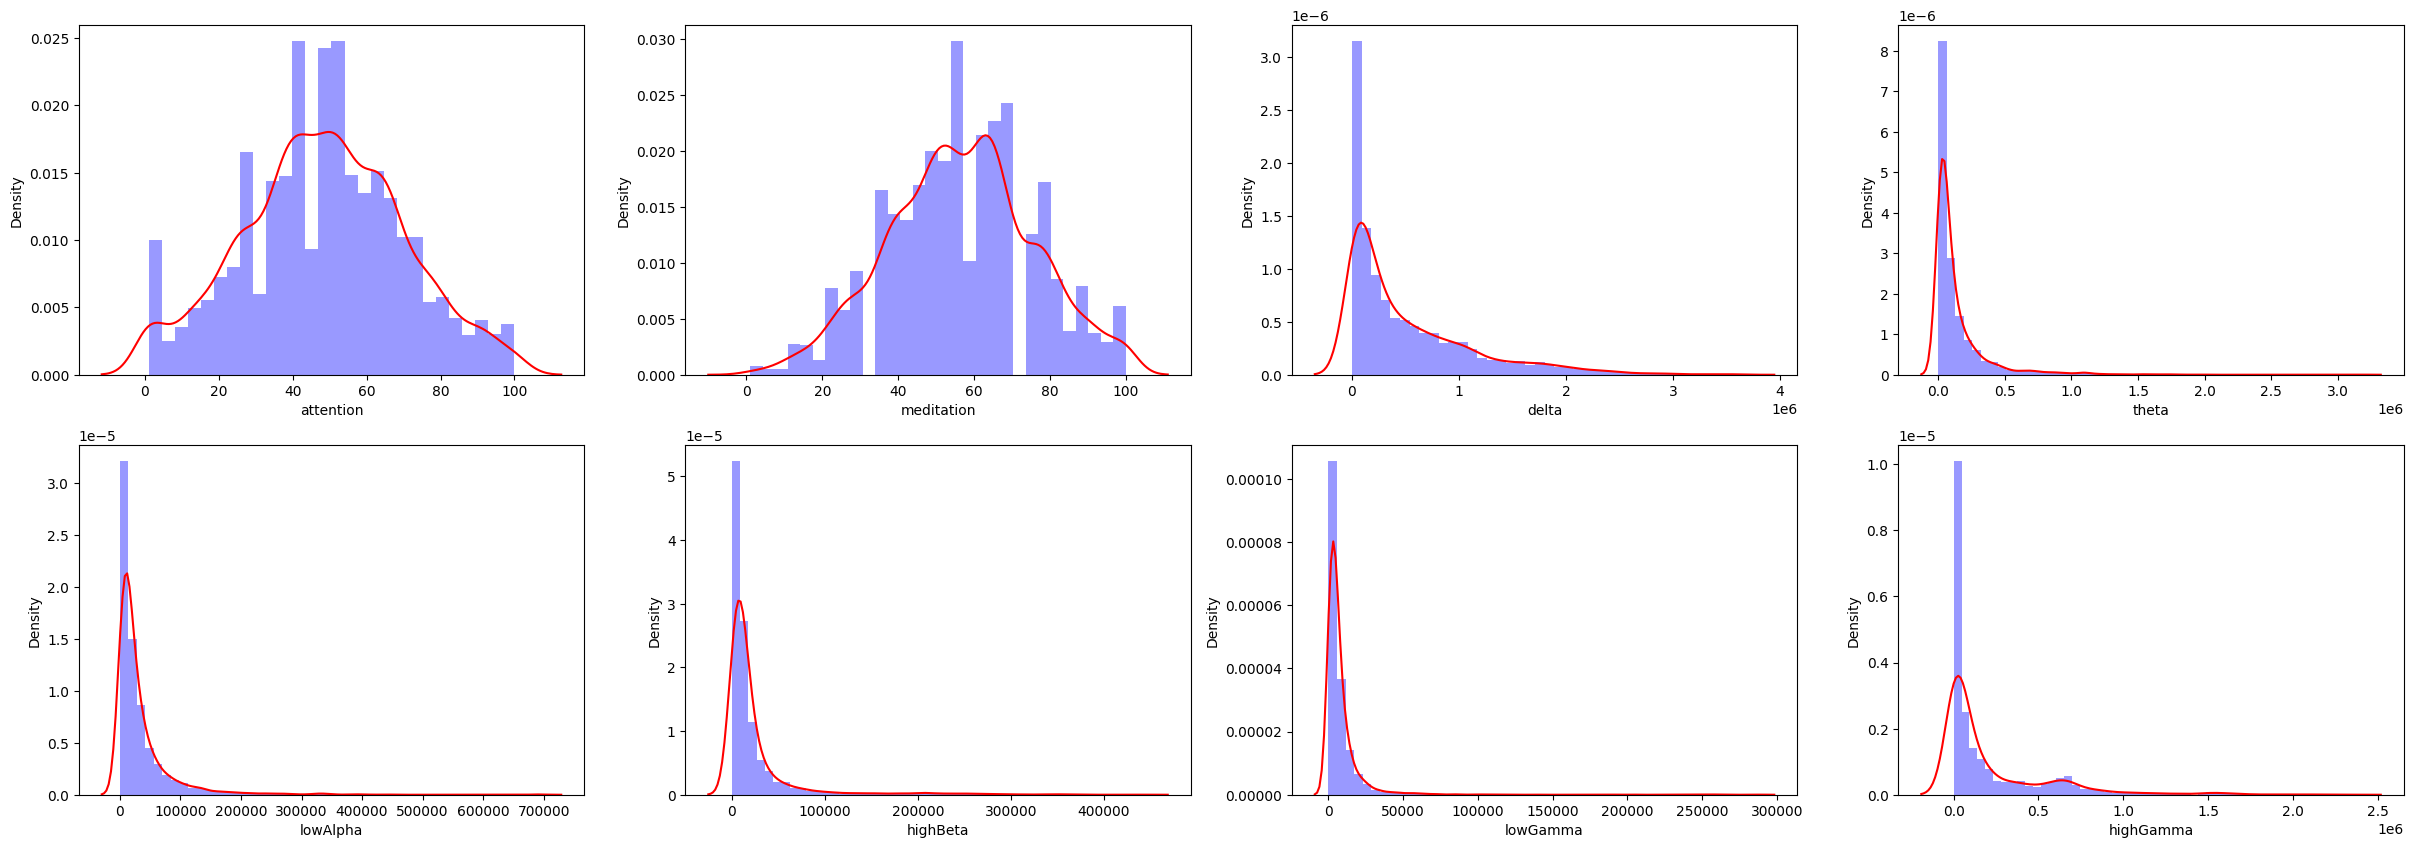

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(30, 10))

sns.distplot(df['attention'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['meditation'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['delta'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['theta'],ax=ax[0,3],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['lowAlpha'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['highBeta'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['lowGamma'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['highGamma'],ax=ax[1,3],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

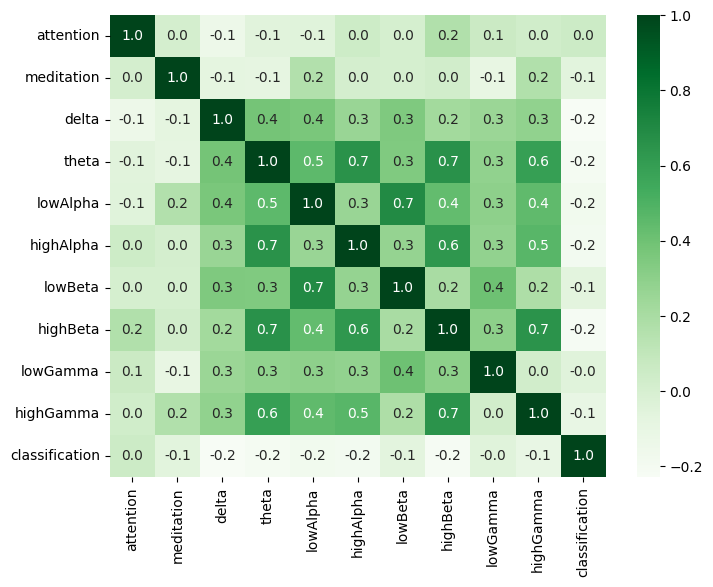

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Greens')
plt.show()

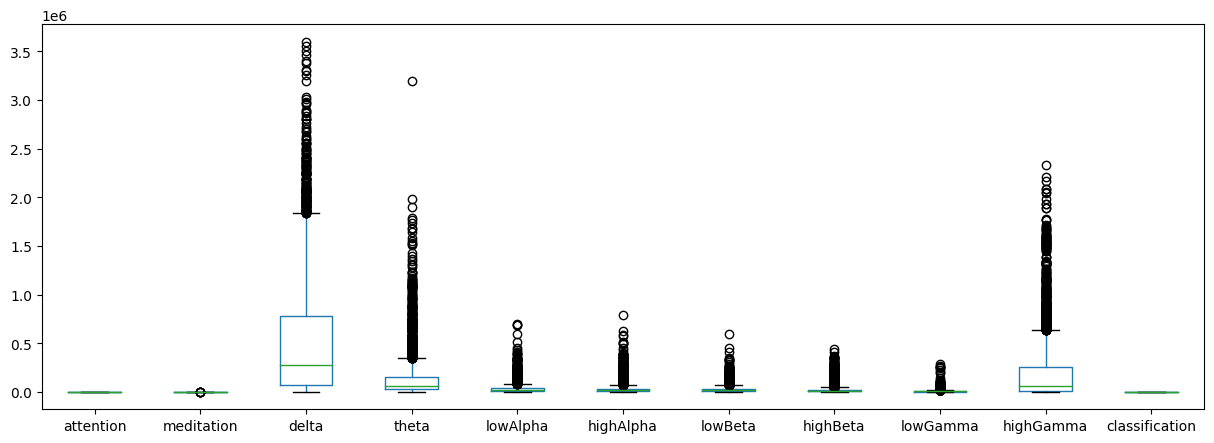

In [53]:
df.boxplot(figsize = (15,5), grid = False)
plt.show()

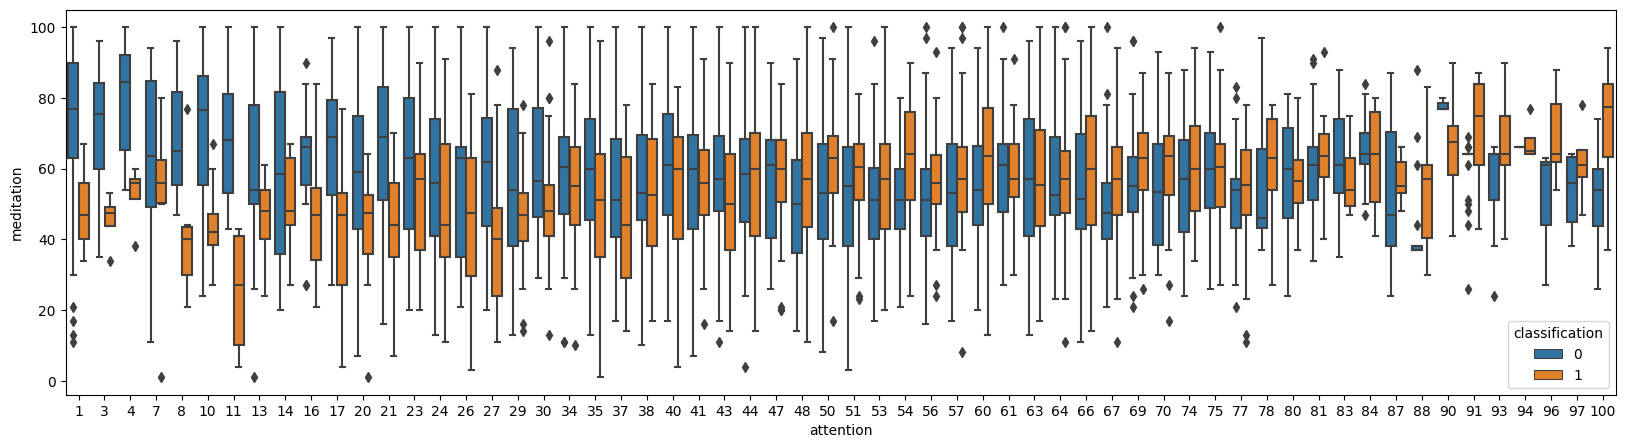

In [34]:
plt.figure(figsize = (20,5))

sns.boxplot(data=df, x='attention', y='meditation', hue ='classification')

plt.show()

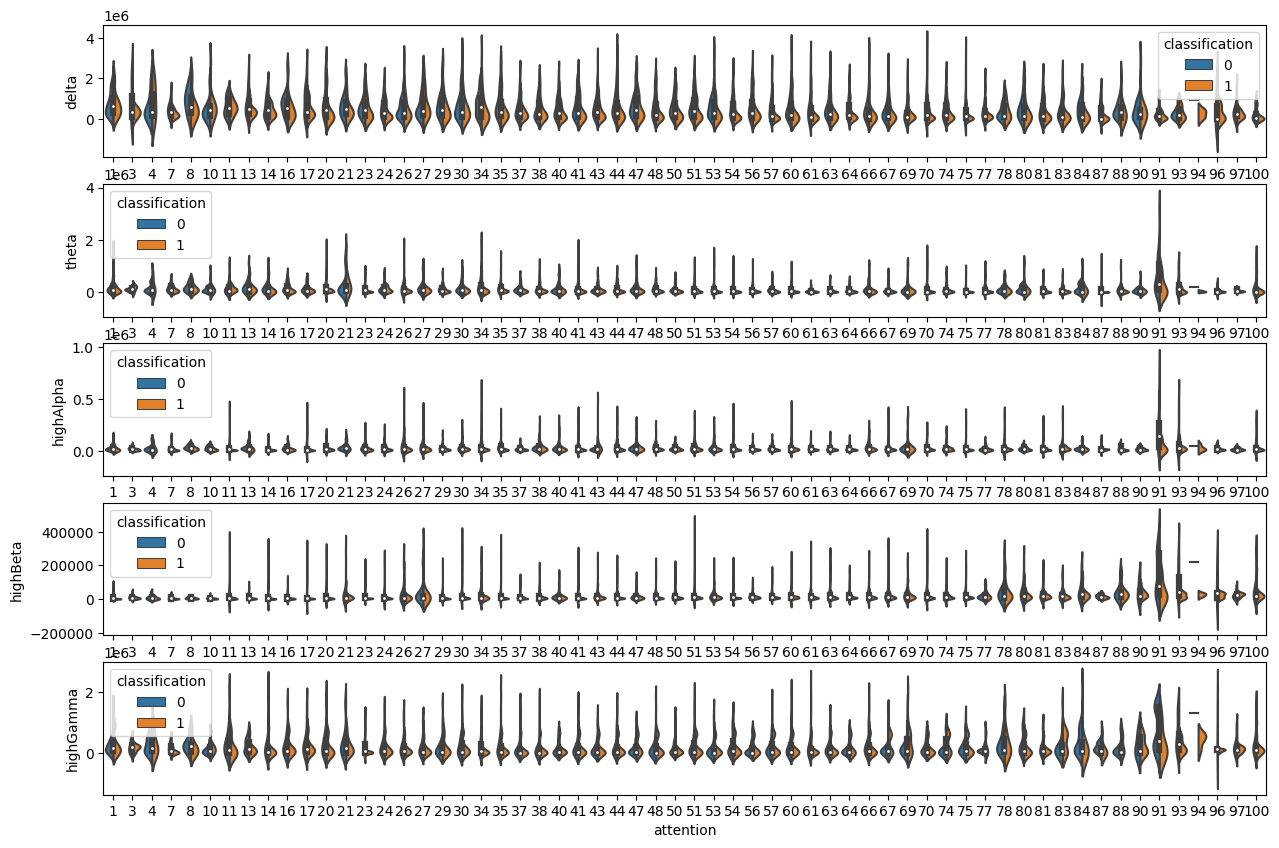

In [30]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10))

sns.violinplot(data=df, x='attention', y='delta', hue ='classification', split=True, ax = ax[0])
sns.violinplot(data=df, x='attention', y='theta', hue ='classification', split=True, ax = ax[1])
sns.violinplot(data=df, x='attention', y='highAlpha', hue ='classification', split=True, ax = ax[2])
sns.violinplot(data=df, x='attention', y='highBeta', hue ='classification', split=True, ax = ax[3])
sns.violinplot(data=df, x='attention', y='highGamma', hue ='classification', split=True, ax = ax[4])

plt.show()

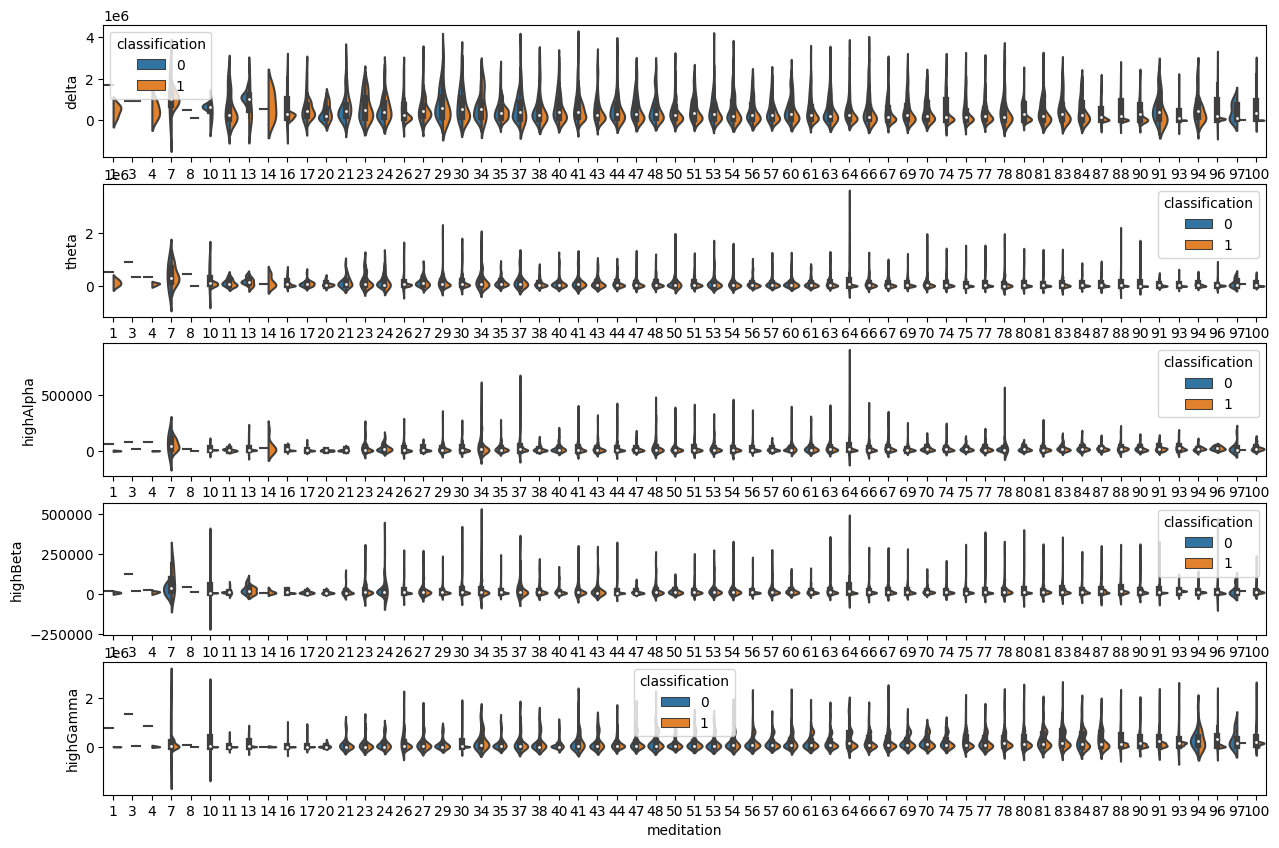

In [31]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10))

sns.violinplot(data=df, x='meditation', y='delta', hue ='classification', split=True, ax = ax[0])
sns.violinplot(data=df, x='meditation', y='theta', hue ='classification', split=True, ax = ax[1])
sns.violinplot(data=df, x='meditation', y='highAlpha', hue ='classification', split=True, ax = ax[2])
sns.violinplot(data=df, x='meditation', y='highBeta', hue ='classification', split=True, ax = ax[3])
sns.violinplot(data=df, x='meditation', y='highGamma', hue ='classification', split=True, ax = ax[4])

plt.show()

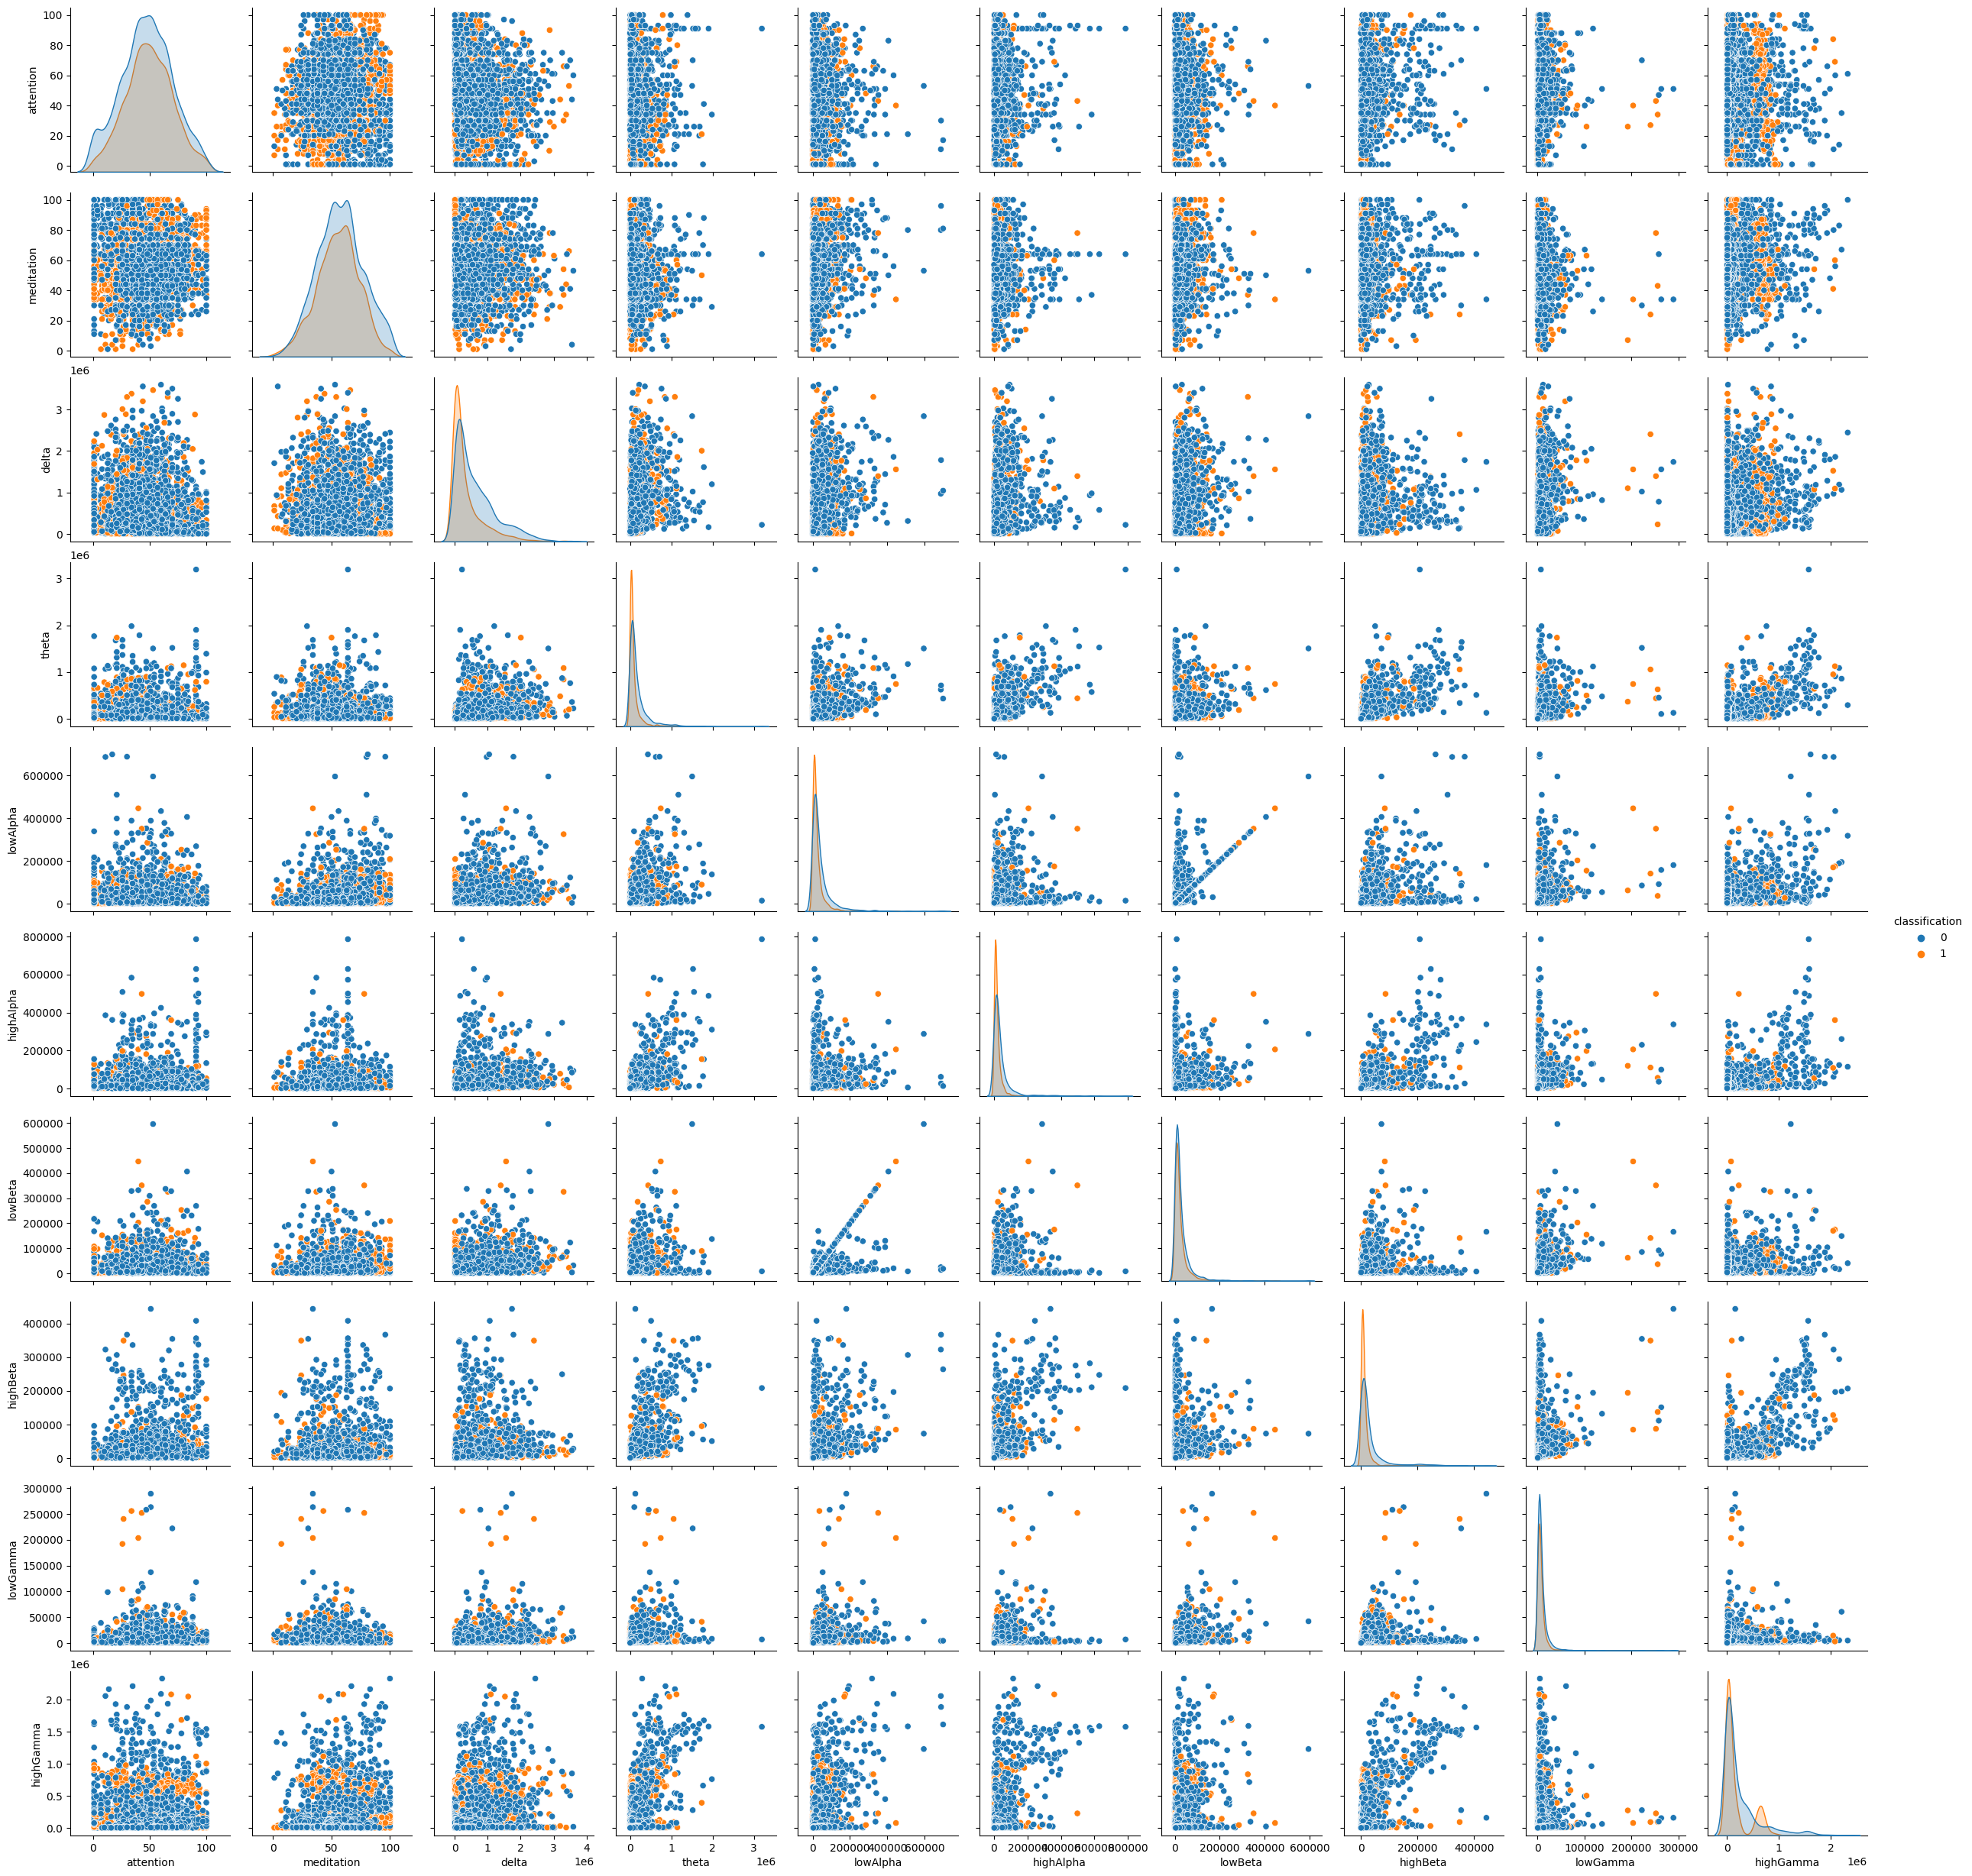

In [35]:
sns.pairplot(df, hue = 'classification')
plt.show()

**Modeling and Evaluation**

In [36]:
X_M = df.drop('classification', axis = 1)
Y_M = df['classification']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.30, random_state=42)

**Logistic Regression**

In [45]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       639
           1       0.63      0.51      0.57       482

    accuracy                           0.66      1121
   macro avg       0.65      0.64      0.64      1121
weighted avg       0.66      0.66      0.65      1121

accuracy:  0.6610169491525424
mean_absolute_error:  0.3389830508474576
mean_squared_error:  0.3389830508474576


**Random Forest Classifier**

In [46]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       639
           1       0.78      0.70      0.74       482

    accuracy                           0.79      1121
   macro avg       0.79      0.78      0.78      1121
weighted avg       0.79      0.79      0.78      1121

accuracy:  0.7867975022301517
mean_absolute_error:  0.21320249776984834
mean_squared_error:  0.21320249776984834


**Decision Tree**

In [47]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       639
           1       0.68      0.66      0.67       482

    accuracy                           0.72      1121
   macro avg       0.71      0.71      0.71      1121
weighted avg       0.72      0.72      0.72      1121

accuracy:  0.719892952720785
mean_absolute_error:  0.280107047279215
mean_squared_error:  0.280107047279215


**SVC**

In [49]:
model_SVC = SVC(kernel = 'poly' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       639
           1       0.66      0.72      0.69       482

    accuracy                           0.72      1121
   macro avg       0.72      0.72      0.72      1121
weighted avg       0.73      0.72      0.72      1121

accuracy:  0.7234611953612846
mean_absolute_error:  0.27653880463871544
mean_squared_error:  0.27653880463871544


**KNeighborsClassifier**

In [50]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       639
           1       0.64      0.68      0.66       482

    accuracy                           0.70      1121
   macro avg       0.69      0.70      0.69      1121
weighted avg       0.70      0.70      0.70      1121

accuracy:  0.6966993755575379
mean_absolute_error:  0.3033006244424621
mean_squared_error:  0.3033006244424621


0    639
1    482
Name: classification, dtype: int64


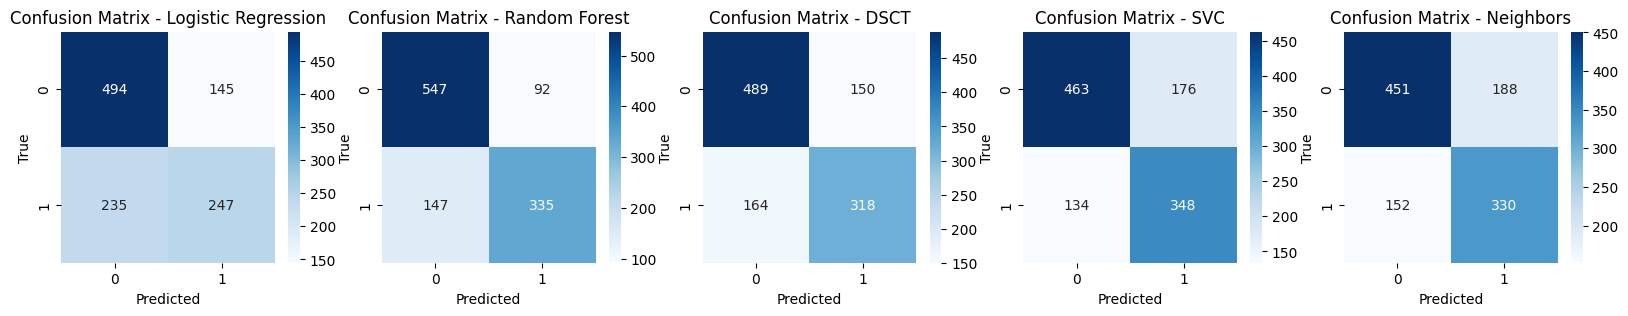

In [51]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

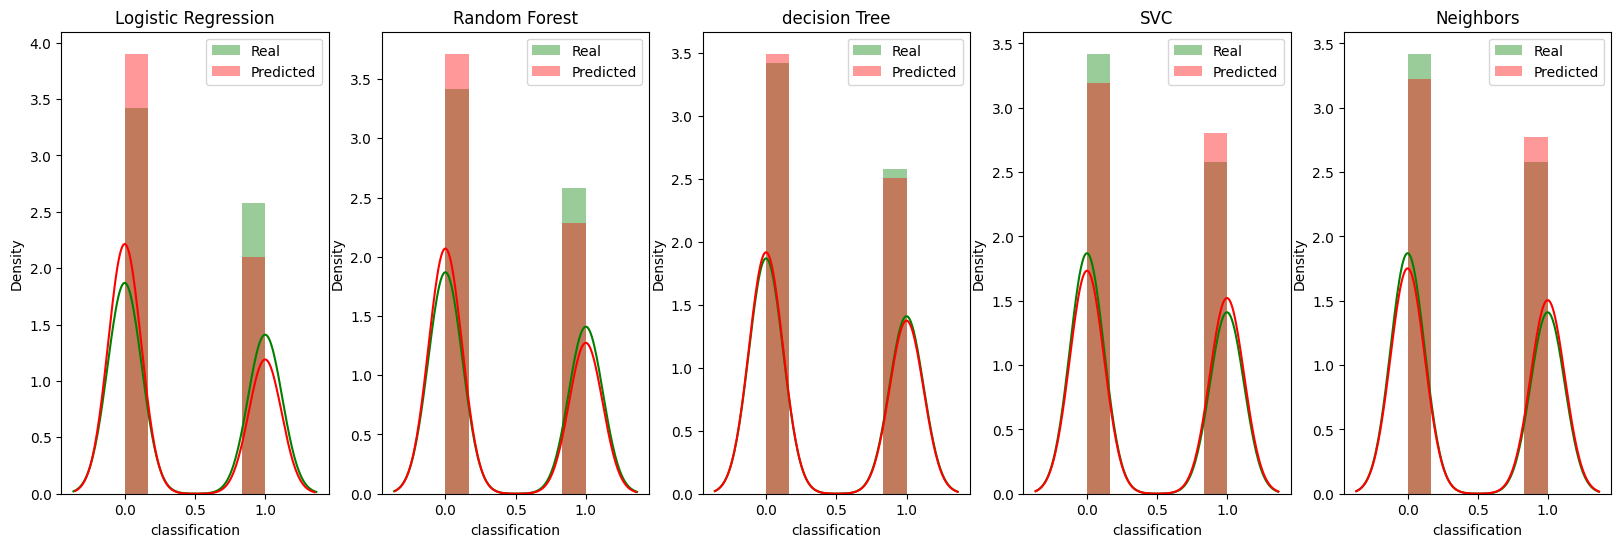

In [52]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()